<a href="https://colab.research.google.com/github/ak1feb3/Hybrid-CNN-LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [1]:
import math
import numpy as np             #numerical operations 
import pandas as pd            #data analysis
import tensorflow as tf        #framework
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from numpy import array
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

IMPORT DATASET 

In [3]:
from google.colab import files
CSVFILE=files.upload()

Saving TCS.csv to TCS.csv


In [5]:
df=pd.read_csv('TCS.csv')    #,parse_dates= True , index_col= "Date"

In [4]:
df.head()

,close
0,29.519140
1,29.119476
2,27.111877
3,27.111877
4,27.046812


In [5]:
df.tail()

,close
4458,3871.300049
4459,3836.949951
4460,3779.149902
4461,3791.899902
4462,3773.199951


CLOSE VALUE

In [6]:
dataset = df["close"]
dataset = pd.DataFrame(dataset)

data = dataset.values

data.shape

(4463, 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   4463 non-null   float64
dtypes: float64(1)
memory usage: 35.0 KB


In [9]:
df.isnull().sum()

close    0
dtype: int64

In [10]:
df.describe()

,close
count,4463.000000
mean,866.537398
std,829.611313
min,26.377609
25%,188.594620
50%,529.713257
75%,1154.784851
max,3954.550049


In [11]:
print(df.shape)

(4463, 1)


In [13]:
plt.figure(figsize=(10, 5))
df['Open'].plot()
df['Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("OPEN AND CLOSE PRICE ")
plt.legend(['OPEN ', 'CLOSE'])
plt.tight_layout()
plt.show()

KeyError: ignored

<Figure size 720x360 with 0 Axes>

TAKING CLOSE VALUES

In [7]:
close=df.reset_index()['close']

In [8]:

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(np.array(close).reshape(-1,1))

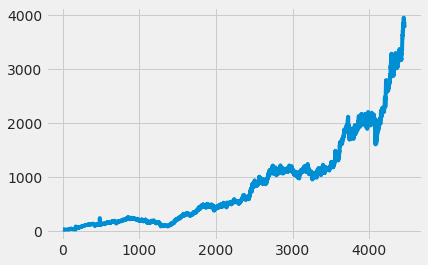

In [16]:
plt.plot(close)


TEST AND TRAIN DATASET(CLOSE)


In [9]:
train_size=int(len(close)*0.75)
test_size=len(close)-train_size


In [18]:
print("TRAIN SIZE : ",train_size, "TEST SIZE : ",test_size)

TRAIN SIZE :  3347 TEST SIZE :  1116


In [10]:
train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

In [20]:
print("TRAIN DATA : ",train_data.shape, "TEST DATA : ",test_data.shape)

TRAIN DATA :  (3347, 1) TEST DATA :  (1176, 1)


In [11]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



RESHAPE DATA TO FIT INTO MODEL

In [22]:
x_train.shape , y_train.shape

((3287, 60, 1), (3287,))

LSTM MODEL 

In [12]:
model = Sequential()
model.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 25))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            30200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 25)                7

COMPILE AND FIT

In [14]:
from keras.callbacks import EarlyStopping

In [15]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics="mean_absolute_error")
model.fit(x_train, y_train, epochs = 150, batch_size = 32,verbose=1);

Epoch 1/150
103/103 [==============================] - 14s 15ms/step - loss: 0.0012 - mean_absolute_error: 0.0197
Epoch 2/150
103/103 [==============================] - 1s 14ms/step - loss: 3.8005e-04 - mean_absolute_error: 0.0131
Epoch 3/150
103/103 [==============================] - 1s 13ms/step - loss: 3.5987e-04 - mean_absolute_error: 0.0126
Epoch 4/150
103/103 [==============================] - 1s 14ms/step - loss: 3.1244e-04 - mean_absolute_error: 0.0120
Epoch 5/150
103/103 [==============================] - 2s 18ms/step - loss: 2.9279e-04 - mean_absolute_error: 0.0116
Epoch 6/150
103/103 [==============================] - 1s 14ms/step - loss: 2.3891e-04 - mean_absolute_error: 0.0103
Epoch 7/150
103/103 [==============================] - 2s 16ms/step - loss: 2.4558e-04 - mean_absolute_error: 0.0108
Epoch 8/150
103/103 [==============================] - 2s 17ms/step - loss: 2.1985e-04 - mean_absolute_error: 0.0104
Epoch 9/150
103/103 [==============================] - 1s 13ms/step

In [18]:
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [19]:
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

NameError: ignored

TESTING MODEL BUILD USING TRAINED DATA

In [20]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
x_test.shape , y_test.shape

((1116, 60, 1), (1116,))

INVERSE SCALAR

In [22]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

35/35 [==============================] - 2s 8ms/step


(1116, 1)

In [ ]:
x_test.shape,y_test.shape

In [24]:
y_test = scaler.inverse_transform([y_test])

RMS METRICS

In [25]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

506.49

PLOTTING THE TEST REULTS

In [26]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions


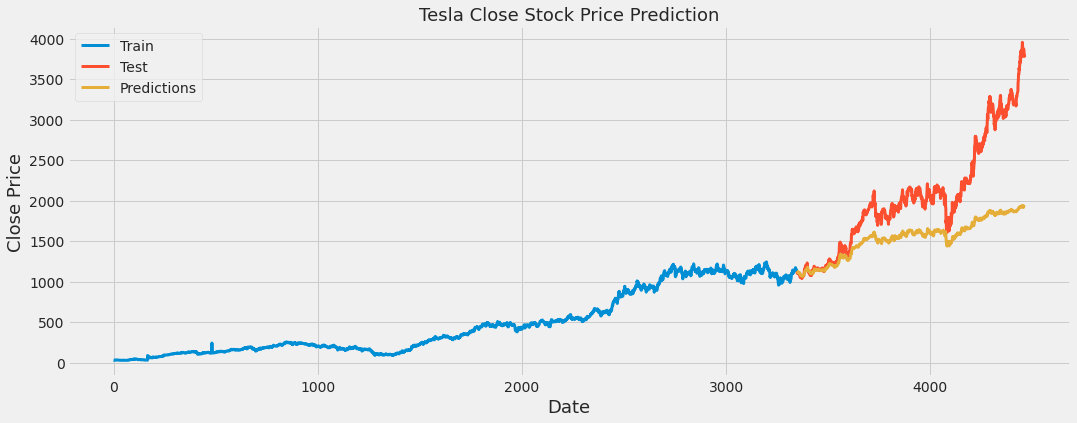

In [28]:
plt.figure(figsize= (16, 6))
plt.title('Tesla Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['close'], linewidth= 3)
plt.plot(test['close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

FORECASTING NEXT 10 DAYS

In [29]:
from datetime import timedelta

In [30]:
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [31]:
future = 30
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0]) 
    print(forcast)
    Xin = insert_end(Xin, out[0, 0]) 
    time.append(pd.to_datetime(df.index[-1]) + timedelta(days=i))

1/1 [==============================] - 0s 33ms/step
[0.4815435]
1/1 [==============================] - 0s 36ms/step
[0.4815435, 0.41642594]
1/1 [==============================] - 0s 39ms/step
[0.4815435, 0.41642594, 0.35051173]
1/1 [==============================] - 0s 21ms/step
[0.4815435, 0.41642594, 0.35051173, 0.30410644]
1/1 [==============================] - 0s 23ms/step
[0.4815435, 0.41642594, 0.35051173, 0.30410644, 0.29053453]
1/1 [==============================] - 0s 20ms/step
[0.4815435, 0.41642594, 0.35051173, 0.30410644, 0.29053453, 0.3030215]
1/1 [==============================] - 0s 23ms/step
[0.4815435, 0.41642594, 0.35051173, 0.30410644, 0.29053453, 0.3030215, 0.32535392]
1/1 [==============================] - 0s 23ms/step
[0.4815435, 0.41642594, 0.35051173, 0.30410644, 0.29053453, 0.3030215, 0.32535392, 0.34387818]
1/1 [==============================] - 0s 26ms/step
[0.4815435, 0.41642594, 0.35051173, 0.30410644, 0.29053453, 0.3030215, 0.32535392, 0.34387818, 0.353254

In [32]:
forcasted_output = np.asanyarray(forcast)   
forcasted_output = forcasted_output.reshape(-1, 1) 
forcasted_output = scaler.inverse_transform(forcasted_output) 

In [33]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "DATE", "CLOSE"

In [ ]:
df_result

,DATE,CLOSE
0,2020-02-03,394.119843
1,2020-02-04,392.510010
2,2020-02-05,390.937958
3,2020-02-06,389.404388
4,2020-02-07,387.909851
5,2020-02-08,386.454102
6,2020-02-09,385.036865
7,2020-02-10,383.657440
8,2020-02-11,382.314667
9,2020-02-12,381.007507


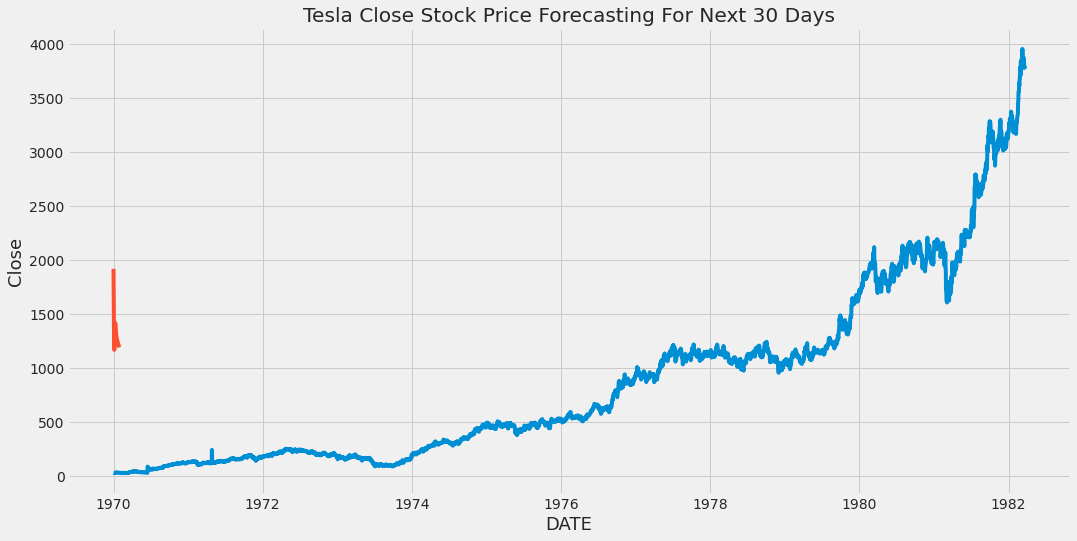

In [35]:
plt.figure(figsize=(16, 8))
plt.title('Tesla Close Stock Price Forecasting For Next 30 Days')
plt.xlabel('DATE', fontsize=18)
plt.ylabel('Close' ,fontsize=18)
plt.plot(df['close'])
plt.plot(df_result.set_index('DATE')[['CLOSE']])